In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patheffects
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Duomenu nuskaitymas is failo.

In [2]:
table = pd.read_excel('BacktestCopy1.xlsx', sheet_name = 'Data', index_col = 'Date')

Portfelio parametru nustatymas.

In [3]:
syms = ["SP5C FP Equity", "XMEU GY Equity", "AEEM FP Equity", "DBZB GY Equity", "HYLE GY Equity",
        "XUEM LN Equity", "XGIN GY Equity", "CSH2 FP Equity", "DPYE LN Equity", "WOOD LN Equity"]

portfolio = ['Augimo','Subalansuotas', 'Konservatyvus']

alloc = [[20, 20, 10], [20, 15, 10], [20, 5, 0], [10, 30, 60], [5, 5, 0], [5, 5, 0], [0, 0, 5], [5, 10, 10], [5, 4, 2.5], [10, 6, 2.5]]

week = 52

alloc_tmp = np.array(alloc) / 100
alloc = alloc_tmp.tolist()


In [4]:
allocation = pd.DataFrame(data = alloc, index = syms, columns = portfolio)

Duomenu tvarkymas, tusciu datu ismetimas ir normalizavimas.  

In [5]:
filt_table = table[syms].copy()
filt_table.dropna(inplace = True)
normalized_series = (filt_table / filt_table.iloc[0])


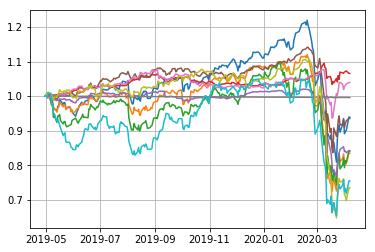

In [6]:
plt.plot(normalized_series)
plt.grid()
plt.show()

Portfelio konstravimas pagal svorius.

In [7]:
normalized_series1 = normalized_series.copy()
normalized_series1['Augimo'] = normalized_series.mul(allocation['Augimo'].values, axis = 1).sum(axis = 1)
normalized_series1['Subalansuotas'] = normalized_series.mul(allocation['Subalansuotas'].values, axis = 1).sum(axis = 1)
normalized_series1['Konservatyvus'] = normalized_series.mul(allocation['Konservatyvus'].values, axis = 1).sum(axis = 1)

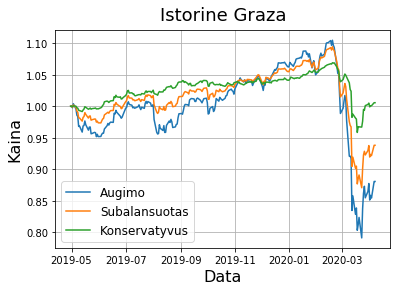

In [8]:

plt.plot(normalized_series1[portfolio])
plt.title("Istorine Graza", fontsize = 18, verticalalignment = 'bottom')
plt.xlabel('Data', fontsize = 16)
plt.ylabel('Kaina', fontsize = 16)

plt.legend(('Augimo', 'Subalansuotas', 'Konservatyvus'), fontsize = 12)
plt.grid()
plt.show()

Duomenu paruosimas statistikai (dienos pokyciai).

In [9]:
data_returns = np.log(filt_table / filt_table.shift(1))
data_returns.dropna(inplace = True)

Statistikos skaiciavimai.

In [10]:
Expected_Return_Augimo = np.sum(data_returns.mean() * allocation['Augimo']) * week
Expected_Std_Augimo = np.sqrt(np.dot(allocation['Augimo'].T,np.dot(data_returns.cov() * week, allocation['Augimo'])))
Sharpe_Augimo = Expected_Return_Augimo / Expected_Std_Augimo

Expected_Return_Subalansuotas = np.sum(data_returns.mean() * allocation['Subalansuotas']) * week
Expected_Std_Subalansuotas = np.sqrt(np.dot(allocation['Subalansuotas'].T,np.dot(data_returns.cov() * week, allocation['Subalansuotas'])))
Sharpe_Subalansuotas = Expected_Return_Subalansuotas / Expected_Std_Subalansuotas

Expected_Return_Konservatyvus = np.sum(data_returns.mean() * allocation['Konservatyvus']) * week
Expected_Std_Konservatyvus = np.sqrt(np.dot(allocation['Konservatyvus'].T,np.dot(data_returns.cov() * week, allocation['Konservatyvus'])))
Sharpe_Konservatyvus = Expected_Return_Konservatyvus / Expected_Std_Konservatyvus

In [11]:
print('Augimo')
print(100*'=')
print('Annualized Returns: {:.3%}'.format(Expected_Return_Augimo))
print('Annualized Volatility: {:.3%}'.format(Expected_Std_Augimo))
print('Sharpe Ratio: {:.4}'.format(Sharpe_Augimo))
print(100*'-')
print('Subalansuotas')
print(100*'=')
print('Annualized Returns: {:.3%}'.format(Expected_Return_Subalansuotas))
print('Annualized Volatility: {:.3%}'.format(Expected_Std_Subalansuotas))
print('Sharpe Ratio: {:.4}'.format(Sharpe_Subalansuotas))
print(100*'-')
print('Konservatyvus')
print(100*'=')
print('Annualized Returns: {:.3%}'.format(Expected_Return_Konservatyvus))
print('Annualized Volatility: {:.3%}'.format(Expected_Std_Konservatyvus))
print('Sharpe Ratio: {:.4}'.format(Sharpe_Konservatyvus))
print(100*'-')

Augimo
Annualized Returns: -2.811%
Annualized Volatility: 9.163%
Sharpe Ratio: -0.3068
----------------------------------------------------------------------------------------------------
Subalansuotas
Annualized Returns: -1.499%
Annualized Volatility: 6.151%
Sharpe Ratio: -0.2438
----------------------------------------------------------------------------------------------------
Konservatyvus
Annualized Returns: 0.014%
Annualized Volatility: 3.197%
Sharpe Ratio: 0.004357
----------------------------------------------------------------------------------------------------
